In [3]:
library(fpp2)

 Time-Series [1:98] from 1875 to 1972: 10.38 11.86 10.97 10.8 9.79 ...


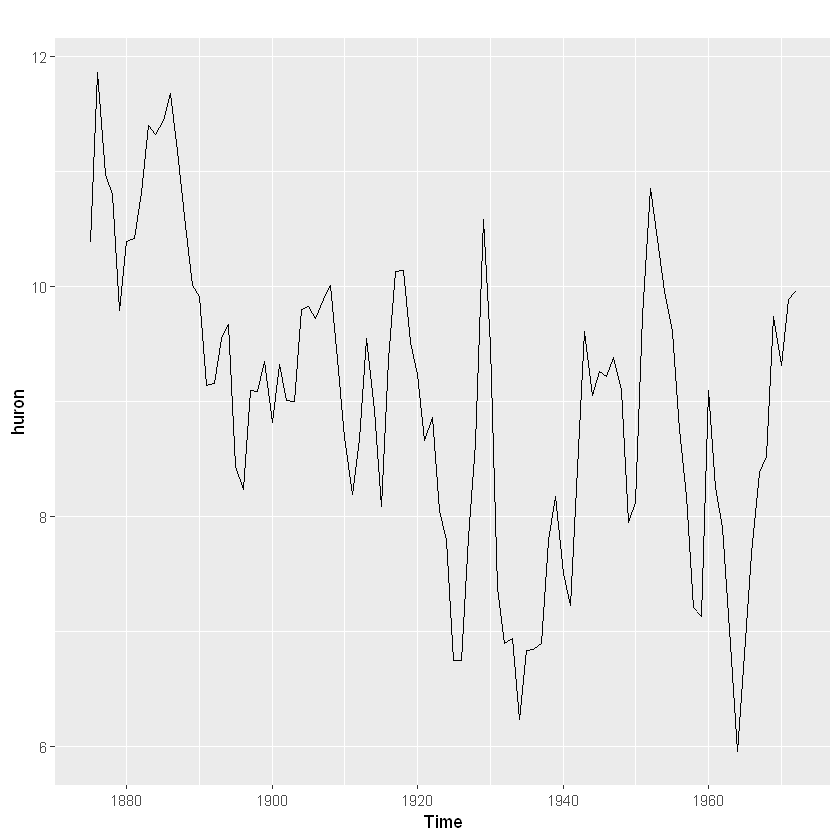

In [4]:
# 이 연습문제에서는 1875년부터 1972년까지 휴론(Huron) 호수의 수위를 기록한 데이터 모음 huron을 사용합니다.
str(huron)
autoplot(huron)

In [5]:
# a. 1920년에 매듭(knot)과 ARMA 오차 구조가 있는 단계적(stepwise) 선형 추세 모델로 휴론 호수 데이터를 맞춰봅시다.

In [6]:
# https://otexts.com/fppkr/nonlinear-regression.html ( knot )

t <- time(huron)
t.break <- 1920

tb <- ts(pmax(0, t - t.break), start = t[1])
newdata <- cbind(t = t, tb = tb)

# https://www.rdocumentation.org/packages/forecast/versions/8.10/topics/auto.arima
# xreg => Optionally, a numerical vector or matrix of external regressors, which must have the same number of rows as y.
#        (It should not be a data frame.)
# stepwise => If TRUE, will do stepwise selection (faster). 
#             Otherwise, it searches over all models. Non-stepwise selection can be very slow, especially for seasonal models.

huron_knot.auto <- auto.arima(huron, xreg = newdata, stepwise = TRUE)
summary(huron_knot.auto)

Series: huron 
Regression with ARIMA(2,0,0) errors 

Coefficients:
         ar1      ar2  intercept        t      tb
      0.9628  -0.3107   118.0840  -0.0572  0.0633
s.e.  0.0973   0.0984    30.5625   0.0161  0.0265

sigma^2 estimated as 0.4594:  log likelihood=-98.86
AIC=209.73   AICc=210.65   BIC=225.24

Training set error measures:
                      ME      RMSE       MAE        MPE    MAPE      MASE
Training set 0.006564992 0.6602643 0.5171943 -0.5457951 5.93402 0.8832368
                      ACF1
Training set -0.0007988887


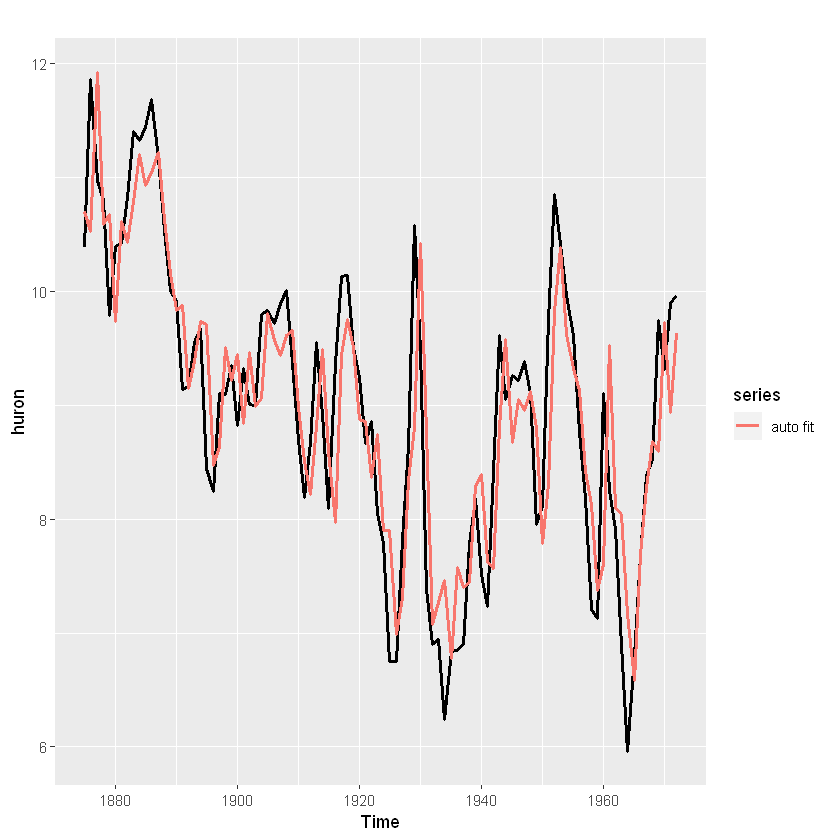

In [8]:
autoplot(huron, size = 1) +
    autolayer(huron_knot.auto$fitted, series = 'auto fit', size = 1)

In [31]:
# b. 다음 30년의 수위를 예측해봅시다.
# https://www.rdocumentation.org/packages/forecast/versions/8.10/topics/forecast

In [34]:
# https://otexts.com/fppkr/nonlinear-regression.html
h <- 30

t.new <- t[length(t)] + seq(h)
tb.new <- tb[length(tb)] + seq(h)
newdata <- cbind(t = t.new, tb = tb.new)

# https://otexts.com/fppkr/dynamic-regression-forecasting.html
forecast_huron.auto <- forecast( huron_knot.auto, xreg = newdata, h = 30 )

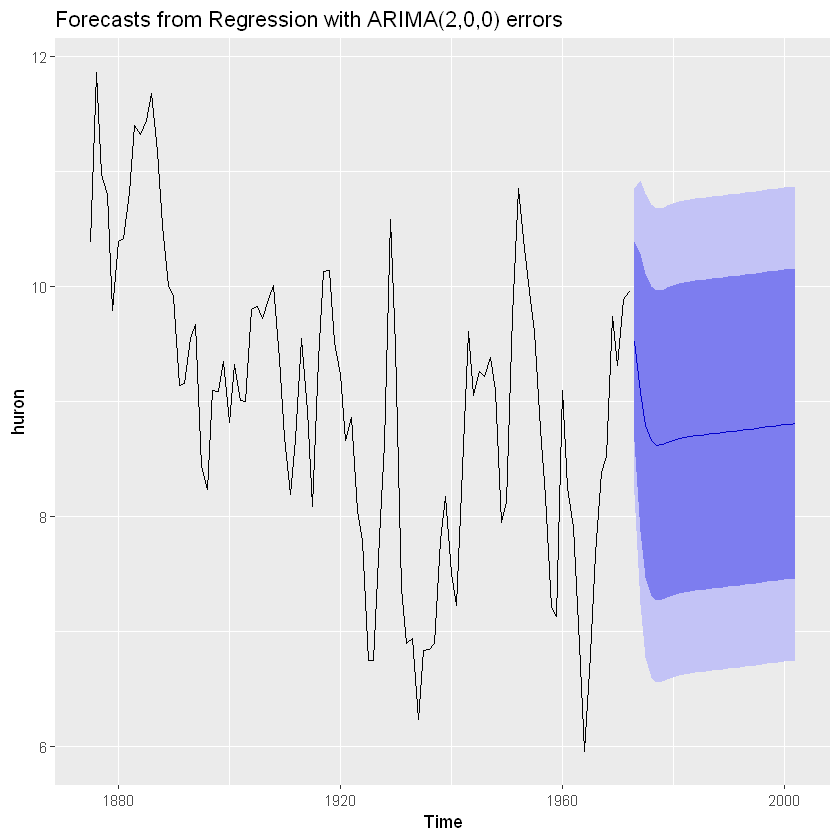

In [21]:
autoplot(forecast_huron.auto)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,0,0) errors
Q* = 3.5674, df = 5, p-value = 0.6132

Model df: 5.   Total lags used: 10



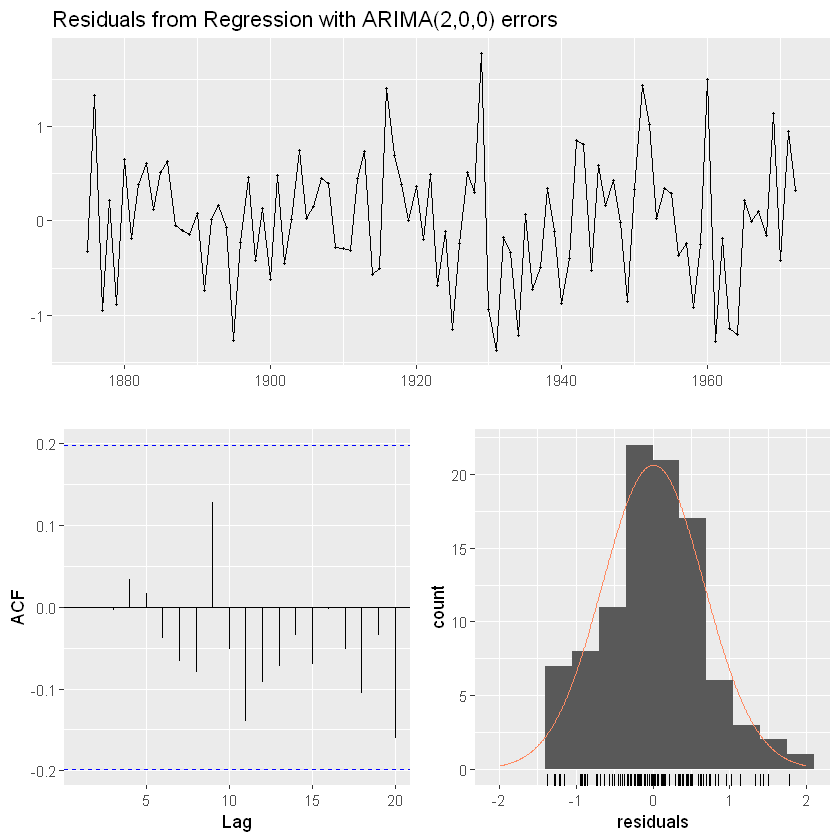

In [23]:
checkresiduals(forecast_huron.auto)